In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display Pandas Dataframes Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
spmd_data = pd.read_csv("datasets/data_SPMD.csv").to_numpy()
pad_data = pd.read_csv("datasets/data_PAD.csv").to_numpy()
critical_data = pd.read_csv("datasets/data_Critical.csv").to_numpy()
atomic_data = pd.read_csv("datasets/data_Atomic.csv").to_numpy()
reduction_data = pd.read_csv("datasets/data_Reduction.csv").to_numpy()
sstatic_data = pd.read_csv("datasets/data_SStatic.csv").to_numpy()
sdynamic_data = pd.read_csv("datasets/data_SDynamic.csv").to_numpy()
sguided_data = pd.read_csv("datasets/data_SGuided.csv").to_numpy()
sauto_data = pd.read_csv("datasets/data_SAuto.csv").to_numpy()

x1 = np.concatenate((np.linspace(1,10,num=10, dtype=int), np.linspace(15,20,num=2, dtype=int)))

algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)', 
     'Code 2 (PAD)', 
     'Code 3 (Critical)', 
     'Code 4 (Atomic)',
     'Code 5 (Reduction)',
     'Code 6 (Static)',
     'Code 7 (Dynamic)',
     'Code 8 (Guided)',
     'Code 9 (Auto)'
    ])

columns = pd.MultiIndex.from_product([['Speedup', 'Efficiency', 'Parallelizability']], names=[''])
codes = ['SPMD', 'PAD', 'Critical', 'Atomic', 'Reduction', 'Static', 'Dynamic', 'Guided', 'Auto']
rows = pd.MultiIndex.from_tuples([(x, code) for x in x1 for code in codes], names=['ThreadQty', ''])
algorithm_metrics = pd.DataFrame(index=rows, columns=columns)


In [3]:
# SECUENTIAL_ALGORITHM_DATA
secuential_data = pd.DataFrame(columns=['Code 0 (Serial)'])
serialET = [0.934688, 0.937044, 0.932595, 0.929958, 0.928163]
secuential_data.loc['1'] = np.mean(serialET)
print("\033[1mSecuential Algorithm Execution Time:\033[0m\n \tSteps: 259999999\n \tTimes Executed per Thread: 5")
secuential_data

Secuential Algorithm Execution Time:
 	Steps: 259999999
 	Times Executed per Thread: 5


,Code 0 (Serial)
1,0.93249


In [4]:
# PARALLEL_ALGORITHMS_DATA
for index in range(len(spmd_data)):
    algorithm_data.loc[f'{index+1}'] = [
        f'{x1[index]}', 
        np.mean(spmd_data[index]), 
        np.mean(pad_data[index]), 
        np.mean(critical_data[index]), 
        np.mean(atomic_data[index]),
        np.mean(reduction_data[index]),
        np.mean(sstatic_data[index]),
        np.mean(sdynamic_data[index]),
        np.mean(sguided_data[index]),
        np.mean(sauto_data[index])
    ]
    
algorithm_data.set_index('ThreadQty', inplace=True)

print("\033[1mParallel Algorithm Analysis:\033[0m\n \tSteps: 259999999\n \tTimes Executed per Thread: 5")
algorithm_data

Parallel Algorithm Analysis:
 	Steps: 259999999
 	Times Executed per Thread: 5


,Code 1 (SPMD),Code 2 (PAD),Code 3 (Critical),Code 4 (Atomic),Code 5 (Reduction),Code 6 (Static),Code 7 (Dynamic),Code 8 (Guided),Code 9 (Auto)
ThreadQty,,,,,,,,,
1,2.194531,2.107658,0.936775,0.935667,0.903826,1.801267,1.743350,1.841464,2.517671
2,2.121198,2.021828,0.499935,0.498863,0.471969,1.362619,5.002779,1.442603,2.316784
3,1.987313,1.930284,0.349356,0.353705,0.329285,1.279745,6.291574,1.299808,2.092238
4,1.989969,1.881427,0.274311,0.277974,0.251255,1.243601,6.266927,1.317832,2.048785
5,2.016937,1.772254,0.244922,0.245059,0.226381,1.581591,11.940427,1.464524,2.142995
6,1.982088,1.735060,0.221057,0.218369,0.223995,1.597234,11.833731,1.642994,1.994367
7,1.960437,1.780333,0.204413,0.198118,0.209074,1.613440,11.284372,1.387265,1.779105
8,1.974419,1.776505,0.189915,0.186642,0.202380,1.595956,11.518438,1.492226,1.809579
9,1.995192,1.850017,0.189058,0.191913,0.199108,1.652451,11.548125,1.467475,1.850376


In [1066]:
# ALGORITHMS_METRICS
for index in range(len(x1)):
    for j in range(len(codes)):
        speedup = secuential_data.iat[0, 0] / np.round(algorithm_data.iat[index, j], 6)
        efficiency = np.round((speedup / algorithm_data.iat[index, j]) * 100, 2)
        parallelizability = np.round(algorithm_data.iat[0, j] / algorithm_data.iat[index, j],3)

        algorithm_metrics.at[(x1[index], codes[j]), ('Speedup')] = speedup
        algorithm_metrics.at[(x1[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
        algorithm_metrics.at[(x1[index], codes[j]), ('Parallelizability')] = parallelizability
        
print("\033[1mAlgorithms Metrics\033[0m")
algorithm_metrics

Algorithms Metrics


Speedup Efficiency Parallelizability
ThreadQty                                                 
1         SPMD       0.424915     19.36%               1.0
          PAD        0.442429     20.99%               1.0
          Critical   0.995425    106.26%               1.0
          Atomic     0.996604    106.51%               1.0
          Reduction  1.031714    114.15%               1.0
          Static     0.517685     28.74%               1.0
          Dynamic    0.534884     30.68%               1.0
          Guided     0.506385      27.5%               1.0
          Auto       0.370378     14.71%               1.0
2         SPMD       0.439605     20.72%             1.035
          PAD        0.461211     22.81%             1.042
          Critical   1.865222    373.09%             1.874
          Atomic      1.86923     374.7%             1.876
          Reduction  1.975743    418.62%             1.915
          Static     0.684336     50.22%             1.322
          Dynamic    0.186394      3.73%             0.348
          Guided     0.646394     44.81%             1.276
          Auto       0.402493     17.37%             1.087
3         SPMD       0.469221     23.61%             1.104
          PAD        0.483084     25.03%             1.092
          Critical   2.669167    764.02%             2.681
          Atomic     2.636348    745.35%             2.645
          Reduction  2.831862     860.0%             2.745
          Static     0.728653     56.94%             1.408
          Dynamic    0.148212      2.36%             0.277
          Guided     0.717406     55.19%             1.417
          Auto        0.44569      21.3%             1.203
4         SPMD       0.468595     23.55%             1.103
          PAD        0.495629     26.34%              1.12
          Critical   3.399388   1239.25%             3.415
          Atomic     3.354593    1206.8%             3.366
          Reduction  3.711328   1477.12%             3.597
          Static      0.74983      60.3%             1.448
          Dynamic    0.148795      2.37%             0.278
          Guided     0.707594     53.69%             1.397
          Auto       0.455143     22.22%             1.229
5         SPMD        0.46233     22.92%             1.088
          PAD         0.52616     29.69%             1.189
          Critical   3.807292   1554.49%             3.825
          Atomic     3.805164   1552.75%             3.818
          Reduction  4.119116   1819.55%             3.993
          Static      0.58959     37.28%             1.139
          Dynamic    0.078095      0.65%             0.146
          Guided     0.636719     43.48%             1.257
          Auto       0.435134      20.3%             1.175
6         SPMD       0.470458     23.74%             1.107
          PAD        0.537439     30.98%             1.215
          Critical   4.218322   1908.25%             4.238
          Atomic     4.270247   1955.52%             4.285
          Reduction  4.162993   1858.52%             4.035
          Static     0.583815     36.55%             1.128
          Dynamic    0.078799      0.67%             0.147
          Guided     0.567555     34.54%             1.121
          Auto       0.467562     23.44%             1.262
7         SPMD       0.475654     24.26%             1.119
          PAD        0.523773     29.42%             1.184
          Critical   4.561792   2231.66%             4.583
          Atomic     4.706738   2375.72%             4.723
          Reduction  4.460094   2133.26%             4.323
          Static     0.577951     35.82%             1.116
          Dynamic    0.082635      0.73%             0.154
          Guided     0.672178     48.45%             1.327
          Auto       0.524134     29.46%             1.415
8         SPMD       0.472286     23.92%             1.111
          PAD        0.524901     29.55%             1.186
          Critical   4.910037   2585.39%             4.933
          

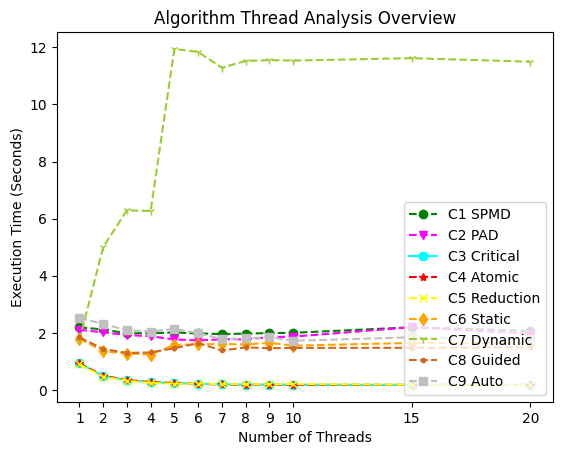

In [1067]:
plt.title("Algorithm Thread Analysis Overview")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(x1, algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(x1, algorithm_data.get('Code 2 (PAD)'), 'v--', label="C2 PAD", color='magenta')
plt.plot(x1, algorithm_data.get('Code 3 (Critical)'), '8-', label="C3 Critical", color='cyan')
plt.plot(x1, algorithm_data.get('Code 4 (Atomic)'), '*--', label="C4 Atomic", color='red')
plt.plot(x1, algorithm_data.get('Code 5 (Reduction)'), 'x--', label="C5 Reduction", color='yellow')
plt.plot(x1, algorithm_data.get('Code 6 (Static)'), 'd--', label="C6 Static", color='orange')
plt.plot(x1, algorithm_data.get('Code 7 (Dynamic)'), '1--', label="C7 Dynamic", color='yellowgreen')
plt.plot(x1, algorithm_data.get('Code 8 (Guided)'), '.--', label="C8 Guided", color='chocolate')
plt.plot(x1, algorithm_data.get('Code 9 (Auto)'), 's--', label="C9 Auto", color='silver')
plt.legend(loc="lower right")
plt.xticks(x1)
plt.show()

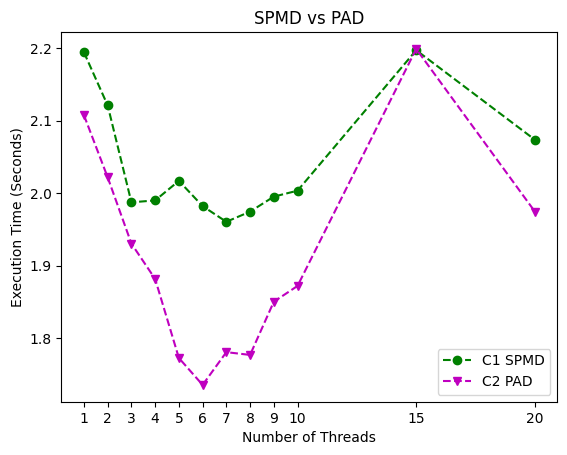

In [1068]:
plt.title("SPMD vs PAD")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(x1, algorithm_data.get('Code 1 (SPMD)'), 'go--', label="C1 SPMD")
plt.plot(x1, algorithm_data.get('Code 2 (PAD)'), 'mv--', label="C2 PAD")
plt.legend(loc="lower right")
plt.xticks(x1)
plt.show()

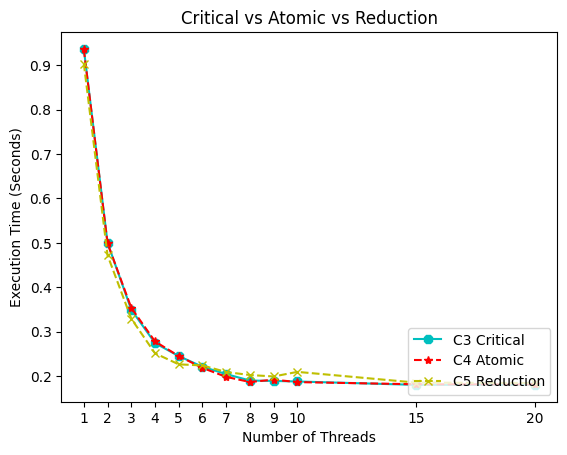

In [1069]:
plt.title("Critical vs Atomic vs Reduction")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(x1, algorithm_data.get('Code 3 (Critical)'), 'c8-', label="C3 Critical")
plt.plot(x1, algorithm_data.get('Code 4 (Atomic)'), 'r*--', label="C4 Atomic")
plt.plot(x1, algorithm_data.get('Code 5 (Reduction)'), 'yx--', label="C5 Reduction")
plt.legend(loc="lower right")
plt.xticks(x1)
plt.show()

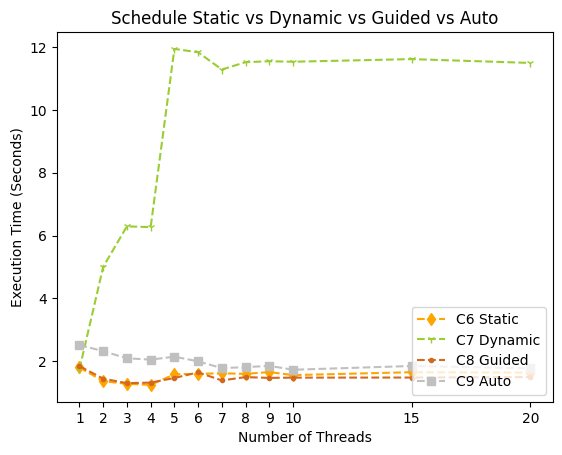

In [1070]:
plt.title("Schedule Static vs Dynamic vs Guided vs Auto")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(x1, algorithm_data.get('Code 6 (Static)'), 'd--', label="C6 Static", color='orange')
plt.plot(x1, algorithm_data.get('Code 7 (Dynamic)'), '1--', label="C7 Dynamic", color='yellowgreen')
plt.plot(x1, algorithm_data.get('Code 8 (Guided)'), '.--', label="C8 Guided", color='chocolate')
plt.plot(x1, algorithm_data.get('Code 9 (Auto)'), 's--', label="C9 Auto", color='silver')
plt.legend(loc="lower right")
plt.xticks(x1)
plt.show()